<a href="https://colab.research.google.com/github/Leo-Vincenzi/PUC-MVP_2/blob/main/teste3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Machine Learning - Prof. Tatiana Escovedo
## Aula 01: Problemas de Classificação

### Prática 1

## Imports e Hiperparâmetros

In [111]:
# Configuração para não exibir os warnings
import warnings
warnings.filterwarnings("ignore")

# Imports necessários
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

from sklearn.model_selection import train_test_split # para particionar em bases de treino e teste (holdout)
from sklearn.model_selection import KFold # para preparar os folds da validação cruzada
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score # para executar a validação cruzada
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score # para a exibição da acurácia do modelo

from sklearn.pipeline import Pipeline

from sklearn.linear_model import LogisticRegression # algoritmo LR
from sklearn.neighbors import KNeighborsClassifier # algoritmo KNN
from sklearn.tree import DecisionTreeClassifier # algoritmo Árvore de Classificação (CART)
from sklearn.naive_bayes import GaussianNB # algoritmo Naive Bayes (NB)
from sklearn.svm import SVC # algoritmo SVM

!pip install catboost -q
from catboost import CatBoostClassifier
from sklearn import svm
import lightgbm as LGB
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
import xgboost as XGB

from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier

TEST_SIZE = 0.20      # tamanho do teste usando train_test_split
RANDOM_STATE = 2018   # número semente para o gerador aleatório
NUMBER_KFOLDS = 5     # número de KFolds usado na validação cruzada (5)
SCORING = 'recall'    # métrica escolhida para avaliação dos modelos
NUM_ESTIMATORS = 100  # número de árvores usadas ​em RandomForrest (100)
MAX_FEATURES = 3      # número máximo de atributos (início = 3)
MAX_ROUNDS1 = 100     # número máximo de iterações na Regressão Logística (100)
MAX_ROUNDS2 = 50
VERBOSE_EVAL = 100    # número de resultados na avaliação da métrica

## Carga do Dataset

In [58]:
# Carregando dataset - arquivo .CVS acessando uma URL
df1 = pd.read_csv("https://raw.githubusercontent.com/Leo-Vincenzi/PUC-MVP_2/main/Creditcard1.csv", sep = ',')
df2 = pd.read_csv("https://raw.githubusercontent.com/Leo-Vincenzi/PUC-MVP_2/main/Creditcard2.csv", sep = ',')
df3 = pd.read_csv("https://raw.githubusercontent.com/Leo-Vincenzi/PUC-MVP_2/main/Creditcard3.csv", sep = ',')
df4 = pd.read_csv("https://raw.githubusercontent.com/Leo-Vincenzi/PUC-MVP_2/main/Creditcard4.csv", sep = ',')
df5 = pd.read_csv("https://raw.githubusercontent.com/Leo-Vincenzi/PUC-MVP_2/main/Creditcard5.csv", sep = ',')
df6 = pd.read_csv("https://raw.githubusercontent.com/Leo-Vincenzi/PUC-MVP_2/main/Creditcard6.csv", sep = ',')

# montando o dataset original de 150 MB (que sofreu "split"), concatenando a seguir os 6 arquivos de 25 MB "splitados"
dataset = pd.concat([df1,df2,df3,df4,df5,df6])

dataset.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


## Separação em conjunto de treino e conjunto de teste com holdout

In [59]:
# define os atributos e o alvo
X = dataset.drop('Class', axis=1)
y = dataset.Class

# faz a divisão do dataset

# Pega o dataset e divide em X_train e X_test (usando parâmetro TEST_SIZE)
X_train, X_test, y_train, y_test = train_test_split(X, y,
      test_size=TEST_SIZE, random_state=RANDOM_STATE, shuffle=True, stratify=y) # holdout com estratificação

In [60]:
# Preparação dos dados

# Separação em bases de treino e teste (holdout)
# array = dataset.values

# Criando os folds para a validação cruzada
kfold = KFold(n_splits=NUMBER_KFOLDS, shuffle=True, random_state=RANDOM_STATE) # faz o particionamento em NUMBER_KFOLDS (5) folds

## Modelagem e Inferência

LR: 0.6866 (0.0380)
DT: 0.7465 (0.0121)
KNN: 0.0327 (0.0147)
NB: 0.6476 (0.0292)
SVM: 0.0000 (0.0000)


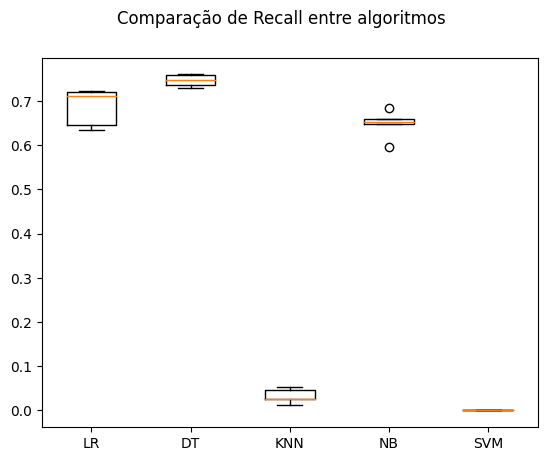

In [68]:
# Modelagem (dura 5 minutos)

# Lista para armazenar os modelos
models = []

# Preparando os modelos e adicionando-os em uma lista
models.append(('LR', LogisticRegression()))
models.append(('DT', DecisionTreeClassifier()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))

# print(models)

# Listas para armazenar resultados e nomes dos modelos
results = []
names = []

# Avaliando um modelo por vez
for name, model in models:
  cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=SCORING)
  results.append(cv_results)
  names.append(name)
  msg = "%s: %.4f (%.4f)" % (name, cv_results.mean(), cv_results.std()) # média e desvio padrão dos 5 resultados da validação cruzada
  print(msg)

# Boxplot de comparação dos modelos
fig = plt.figure()
fig.suptitle('Comparação de Recall entre algoritmos')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

RF: 0.754590 (0.021141)
Ada: 0.741339 (0.023964)
Learning rate set to 0.5
0:	learn: 0.0200331	total: 65.9ms	remaining: 6.53s
99:	learn: 0.0004849	total: 3.56s	remaining: 0us
Learning rate set to 0.5
0:	learn: 0.0199431	total: 37.6ms	remaining: 3.72s
99:	learn: 0.0002960	total: 3.46s	remaining: 0us
Learning rate set to 0.5
0:	learn: 0.0188596	total: 38.2ms	remaining: 3.78s
99:	learn: 0.0002550	total: 4.22s	remaining: 0us
Learning rate set to 0.5
0:	learn: 0.0196779	total: 34.8ms	remaining: 3.44s
99:	learn: 0.0003647	total: 3.52s	remaining: 0us
Learning rate set to 0.5
0:	learn: 0.0199734	total: 40.6ms	remaining: 4.02s
99:	learn: 0.0003845	total: 3.48s	remaining: 0us
CatBoost: 0.781923 (0.020478)
XGBoost: 0.738838 (0.033552)
LightGBM: 0.827143 (0.048803)
Voting: 0.631754 (0.055277)


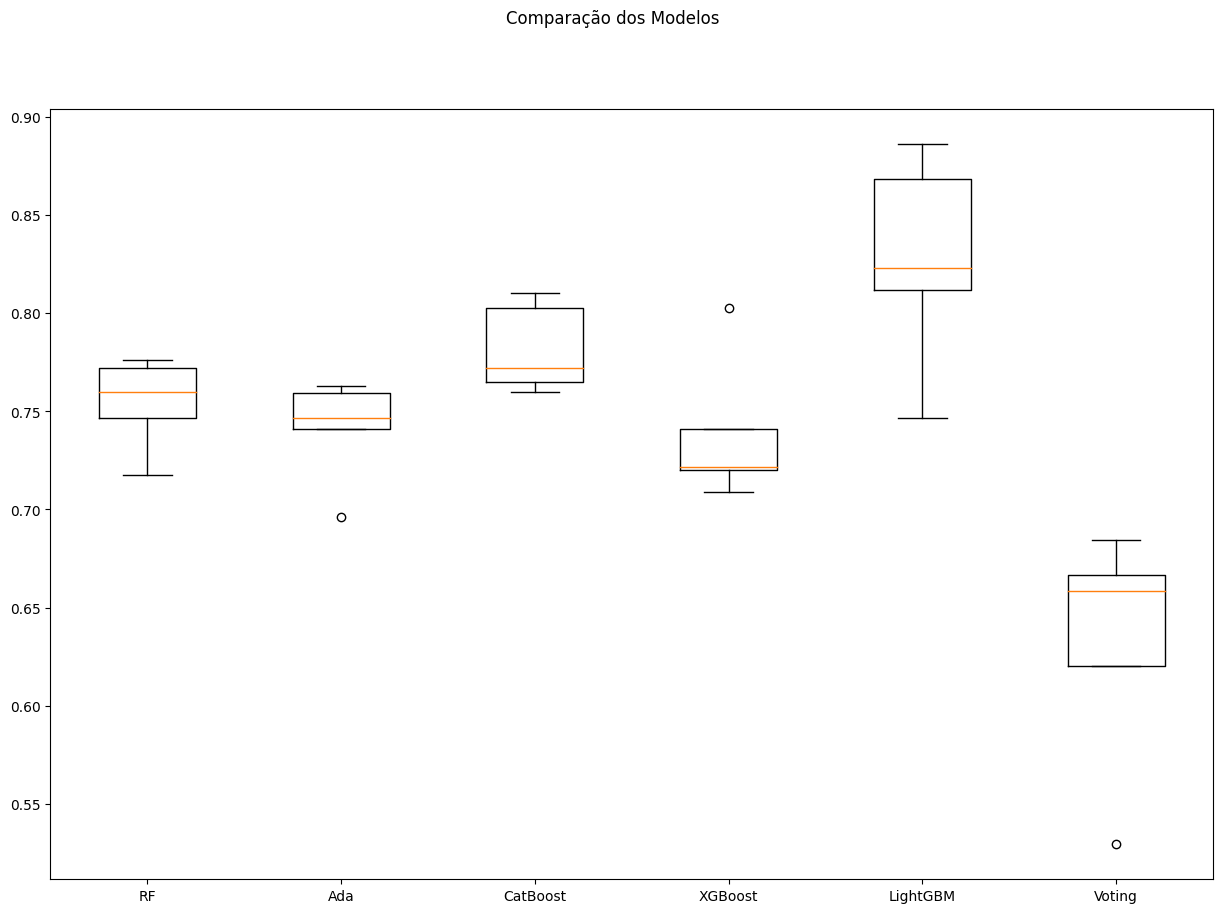

In [113]:
# Definindo os parâmetros do classificador base para o BaggingClassifier
base = DecisionTreeClassifier()

# Criando os modelos para o VotingClassifier
estimators = []
model_1 = LogisticRegression(max_iter=MAX_ROUNDS1)
estimators.append(('logistic', model_1))
model_2 = DecisionTreeClassifier()
estimators.append(('cart', model_2))
model_3 = SVC()
estimators.append(('svm', model_3))

# Lista que armazenará os modelos
models = []

# Criando os ensembles e adicionando-os na lista de modelos
models.append(('RF', RandomForestClassifier(n_estimators=NUM_ESTIMATORS,max_features=MAX_FEATURES))) # (42 segundos - 8 minutos)
models.append(('Ada', AdaBoostClassifier(n_estimators=NUM_ESTIMATORS))) # (52 segundos)
models.append(('CatBoost', CatBoostClassifier(n_estimators=NUM_ESTIMATORS,metric_period=VERBOSE_EVAL))) # (21 segundos)
models.append(('XGBoost', XGBClassifier(objective='binary:logistic',eta=0.039,silent=True,max_depth=2,subsample=0.8,colsample_bytree=0.9,eval_metric='auc',random_state=RANDOM_STATE)))
models.append(('LightGBM', LGBMClassifier(boosting_type='gbdt',objective='binary',metric='auc',learning_rate=0.05,num_leaves=7,max_depth=4,min_child_samples=100,max_bin=100,subsample=0.9,subsample_freq=1,colsample_bytree=0.7,min_child_weight=0,min_split_gain=0,nthread=8,verbose=0,scale_pos_weight=150))) # (16 segundos)
models.append(('Voting', VotingClassifier(estimators))) # (2 minutos)

# Listas para armazenar os resultados
results = []
names = []

# Avaliação dos modelos
for name, model in models:
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=SCORING)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

# Boxplot de comparação dos modelos
fig = plt.figure(figsize=(15,10))
fig.suptitle('Comparação dos modelos Ensemble')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [34]:
# Criando um modelo com todo o conjunto de treino
model = GaussianNB()
model.fit(X_train, y_train)

# Fazendo as predições com o conjunto de teste
predictions = model.predict(X_test)

# Estimando a acurácia no conjunto de teste
print(accuracy_score(y_test, predictions))

0.9939082195147643
